# Project 5:  Monte Carlo, Demon Algorithm
## Abstract
In this lab, we investigated the distribution of velocities of nitrogen molecules in a 1D gas. We did this by starting the velocities out in some random distribution, then used a 'step' to bump one molecule up or down in velocity randomly. We applied the concept of the demon algorithm to exchange energy between the system and the demon. With this algorithmic strategy, we used a final distribution of velocities and energies, which can change with different iterations, to determine the temperature of the system. The temperature of the system changes with every distribution because of a random distribution.
## Description
There are a number of approaches to complex problems involving large numbers of interactions where the objective is to find the "average" behavior of the system over a long period of time. Looking at "average" behavior however glosses over the precision of following each interaction and attempts only to see what happens on a less fine-grained scale. This means we sacrifice the hope of getting a detailed pictured of a microscopic physical process, but achieve the reward of a more general understanding of the large scale consequences of that process. The demon algorithm is such an approach. The demon algorithm is a Monte Carlo method for efficiently sampling members of a microcanonical ensemble, a collection of microscopic states which have fixed energy, volume and number of particles, with a given energy. An additional degree of freedom, called 'the demon', is added to the system and is able to store and provide energy. If a drawn microscopic state has lower energy than the original state, the excess energy is transferred to the demon. For a sampled state that has higher energy than desired, the demon provides the missing energy if it is available. The demon can not have negative energy and it does not interact with the particles beyond exchanging energy. Note that the additional degree of freedom of the demon does not alter a system with many particles significantly on a macroscopic level.
The full procedure can be summarized by the following steps:
1. Perform a random change in the state of a randomly chosen particle (e. g. change velocity or position).
2. Calculate the change in energy $\Delta E$ of the thermal system.
3. Negative $\Delta E$, i. e. excess energy, is given to the demon by adding $|\Delta E|$ to the demon. This case $(\Delta E<0)$ is always accepted.
4. The demon provides positive $\Delta E$ to keep the total energy constant only if it has sufficient energy, i. e. $E_{d}>\Delta E$. In this case the change is accepted, otherwise the randomly chosen change in velocity is rejected and the algorithm is restarted from the original microscopic state.
5. If the change is accepted, repeat the algorithm for the new configuration.


Since energy fluctuations per degree of freedom are only of order 1/N, the presence of the demon has little effect on macroscopic properties of systems with high numbers of particles. After many iterations of the algorithm, the interplay of demon and random energy changes equilibrates the system. Assuming that a particular system approaches all possible states over very long times (quasi-ergodicity), the resulting Monte Carlo dynamics realistically sample microscopic states that correspond to the given energy value. This is only true if macroscopic quantities are stable over many Monte Carlo steps, i. e. if the system is at equilibrium.

## Algorithm and Discussion
We are investigating the distribution of velocities of nitrogen molecules in a 1D gas. We did this by starting the velocities out in some random distribution. Generating a random distribution of numbers between 0 and 1, subtracting each number by $\frac{1}{2}$, and multiplying by 1020 to get a set of random numbers between -510 and 510 which is the average velocity of a nitrogen molecule. We used a 'shake' function to carry out the demon algorithm of accepting and rejecting energy change. we were careful to note that the energy change is the final kinteic energy of the molecule minus the initial kinetic energy of the molecule.
 $$\Delta E = \frac{1}{2} m(v + \Delta v)^2 - \frac{1}{2} m(v)^2 $$
 Using the algorithm we can get the average velocity of the nitrogen molecules and find out how much percentage of a change in energy is accepted.
The demon acts like an small thermometer. According to the Maxwell-Boltzmann distribution the energy distribution of the demon's energy should go like:

$$P(E) = P_0 e^{-E/k_B T}$$
Where $P_0$ is the basically the probability of having an energy of zero. (Actually, maybe a better way to think of it is as a normalization constant that's determined by the requirement that the total probability to have any energy is 1.0). The histogram of demon energies tells us the number of times the demon have various values of energy during the calculation. This is proportional to the probability that the demon had various energies. We can fit that probability to an exponential curve (or the log of the probability to a straight line) and from the slope of the line deduce the temperature.
## Implementation and code

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
import random

In [2]:
g = 9.8          # grav field strength
kb = 1.38e-23    # boltzman constant
demonE = 0.0   # initial demon energy
kbT = 4.1124e-21
N_A = 6.022e23
m = 28 * 1.67e-27
N = 10000        # number of molecules
M = 400000       # number of iterations
v_x = (np.sqrt((3*kbT*N_A)/m))
V = 1020

(array([1054.,  952.,  974., 1014.,  964.,  999., 1027.,  970., 1063.,
         983.]),
 array([-5.09928931e+02, -4.07936411e+02, -3.05943891e+02, -2.03951371e+02,
        -1.01958851e+02,  3.36690539e-02,  1.02026189e+02,  2.04018709e+02,
         3.06011229e+02,  4.08003749e+02,  5.09996269e+02]),
 <a list of 10 Patch objects>)

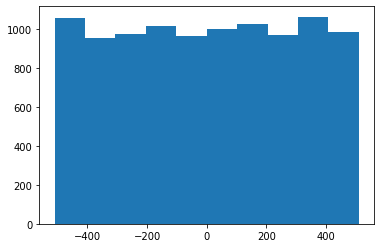

In [3]:
def setup(N=100, L = 1):
    v_x = L * (np.random.rand(N) - 0.5)     
    return v_x

v_xarray = setup(N=10000, L = 1020)
pl.hist(v_xarray)

89.313 percent accepted
Average Velocity = 294.420 m/s


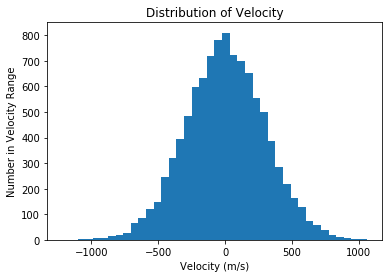

In [4]:
def shake(v_x, demonE, delta = 0.1):
    ix = int(np.random.rand()*len(v_x))
    deltav_x = delta*np.random.normal()  
    k_i = ((v_x[ix]**2) * m * 0.5)
    k_f = ((v_x[ix] + deltav_x)**2) * m * 0.5
    deltaE = k_f - k_i
    accept = False
    if deltaE < demonE:  
        demonE -= deltaE  
        v_x[ix] += deltav_x
        accept = True
    return demonE, accept

v_x = setup(N, L = V)
acceptCount = 0
demonList = []
for i in range(M):
    demonE, accept = shake(v_x, demonE, delta = 100)     
    demonList.append(demonE)
    if accept:
        acceptCount += 1

pl.title("Distribution of Velocity")
pl.xlabel("Velocity (m/s)")
pl.ylabel("Number in Velocity Range")
pl.hist(v_x, bins = 40)
print(100.0*acceptCount/M, "percent accepted")
print("Average Velocity = %4.3f m/s" % np.sqrt(((v_x**2).sum()/len(v_x))))

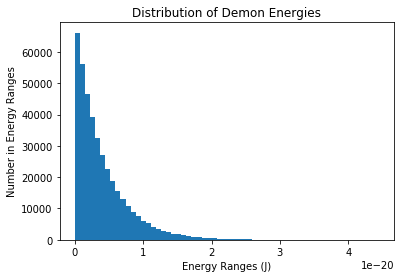

In [5]:
pl.title("Distribution of Demon Energies")
pl.xlabel("Energy Ranges (J)")
pl.ylabel("Number in Energy Ranges")
ns, bins, patches = pl.hist(demonList, bins=60)

slope= -2.4760923611207834e+20 +/- 1.0984677147535735e+18
intercept= 11.206972331434594 +/- 0.00625221324987585
Temperature= 292.65373640239284 +/- 1.2982984241125803 K


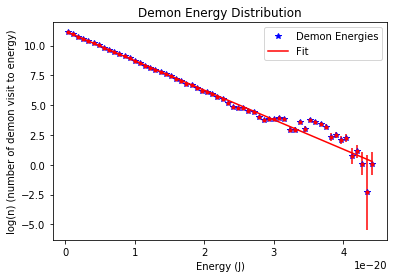

In [6]:
from scipy.optimize import curve_fit

def fLinear(x, slope, b):
    return (slope * x) + b

energies = (bins[:-1]+bins[1:])/2.0  
xvals = np.array(energies)  
yvals = np.log(np.array(ns)+.1)
sig = 1.0/np.sqrt(np.array(ns)+ .1)  

m0 = (yvals[-1]-yvals[0])/(xvals[-1]-xvals[0])
b0 = yvals[0]-m0 * xvals[0]

popt, pcov = curve_fit(fLinear, xvals, yvals, p0=(m0, b0), sigma=sig)

slope = popt[0]        
dm = np.sqrt(pcov[0,0]) 
b = popt[1]         
db = np.sqrt(pcov[1,1])

energy = ((0.5 * m * v_x**2).sum())/10000
Temp = -1.0/(slope * kb)


dT = abs(dm* Temp/slope)
print("slope=", slope, "+/-", dm )
print("intercept=", b, "+/-", db)
print("Temperature=", Temp, "+/-", dT, "K")
pl.title("Demon Energy Distribution")
pl.xlabel("Energy (J)")
pl.ylabel("log(n) (number of demon visit to energy)")
pl.errorbar(xvals, yvals, sig, fmt='r.')
pl.plot(xvals, yvals,'b*',label="Demon Energies")
pl.plot(xvals,fLinear(xvals, slope, b),'r-', label="Fit")
pl.legend()

We plotted the logarithm of the number of demon visit versus the Energy. We found out that the slope is nearly a straight line. We used a curve fit to determine the slope of this graph, which we used to figure out the temperature.

## Conclusion
The main point of this project was to use the generation of random data to answer non-trivial questions. We investigated the distribution of velocities of nitrogen molecules in a 1D gas. Using the demon algorithm strategy, we computed the velocity and temperature distributions of this nitrogen molecule which changes with every iteration because it is randomized.